In [30]:
'''
a
'''

from __future__ import division  ## For Division

## Importing the ususal suspects

import numpy as np
import pandas as pd
from pandas import Series, DataFrame

## Visualization Libraries
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style = 'darkgrid')

%matplotlib inline

## To read stock data from yahoo
from pandas_datareader.data import DataReader

## For timestamps
from datetime import datetime

In [17]:
## The stocks on which data analysis will be done are Apple, Google, Microsoft, Amazon

tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']

In [27]:
## Setting up end date and start date for data grabbing
end = datetime.now()

start = datetime(end.year-1, end.month, end.day )

In [31]:
## FOR loop for grabbing yahoo finance data and setting it up as a dataframe

for stock in tech_list:
    globals()[stock] = DataReader(stock,'yahoo', start, end)

In [33]:
AAPL.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-08-26,207.190002,205.059998,205.860001,206.490005,26043600.0,204.461349
2019-08-27,208.550003,203.529999,207.860001,204.160004,25873300.0,202.154251
2019-08-28,205.720001,203.320007,204.100006,205.529999,15938800.0,203.510803
2019-08-29,209.320007,206.660004,208.500000,209.009995,20990500.0,206.956604
2019-08-30,210.449997,207.199997,210.160004,208.740005,21143400.0,206.689255


In [34]:
AAPL.describe()

,High,Low,Open,Close,Volume,Adj Close
count,254.000000,254.000000,254.000000,254.000000,2.540000e+02,254.000000
mean,303.823189,296.591654,299.805551,300.693543,3.670697e+07,299.283034
std,66.162415,64.463169,65.275648,65.593932,1.770386e+07,66.124106
min,205.720001,203.320007,204.100006,204.160004,1.165440e+07,202.154251
25%,258.357498,249.385002,253.462502,256.147507,2.515648e+07,253.899521
50%,293.184998,284.960007,286.389999,289.195007,3.175235e+07,287.792572
75%,325.519997,320.650002,323.514992,324.222496,4.216638e+07,322.609909
max,515.140015,500.329987,514.789978,506.089996,1.067212e+08,506.089996


In [35]:
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 254 entries, 2019-08-26 to 2020-08-26
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       254 non-null    float64
 1   Low        254 non-null    float64
 2   Open       254 non-null    float64
 3   Close      254 non-null    float64
 4   Volume     254 non-null    float64
 5   Adj Close  254 non-null    float64
dtypes: float64(6)
memory usage: 13.9 KB


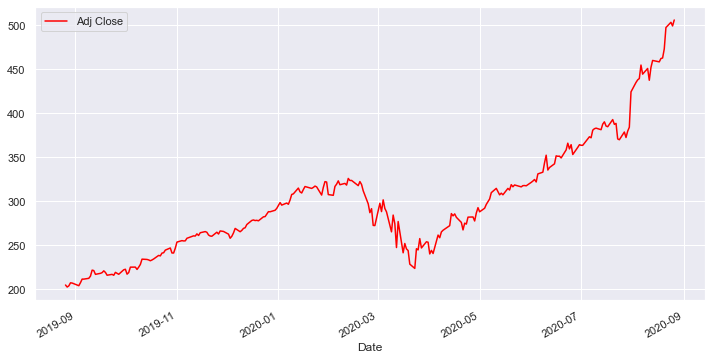

In [55]:
## A plot of historical data of closing price.

plt.figure(figsize = (12,6))
AAPL['Adj Close'].plot(legend = True,alpha = 1, color = 'red')

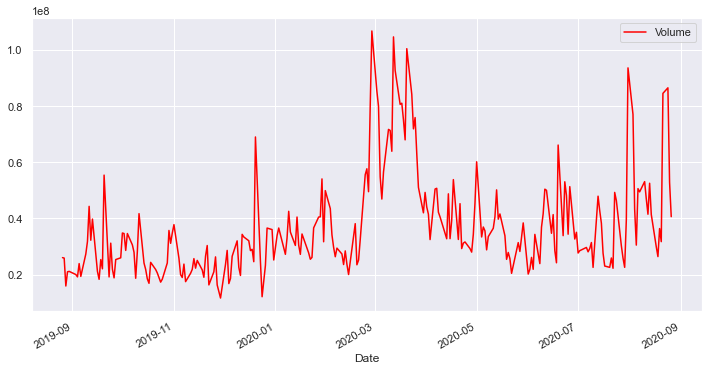

In [51]:
## Total volume of stock being traded each day.

plt.figure(figsize = (12,6))
AAPL['Volume'].plot(legend = True, alpha = 1, color = 'red')

# <font color = 'blue'> MOVING AVERAGE FOR STOCK </font>

In [69]:
## Using the pandas built in rolling mean calculator.
## MOVING AVERAGE is basically a series of MEAN of different SUBSETS of entire DATA SET.

ma_day = [10,20,50]

for ma in ma_day:
    column_name = "MA for %s days" %(str(ma))
    AAPL[column_name] = (AAPL['Adj Close']).rolling(ma).mean()

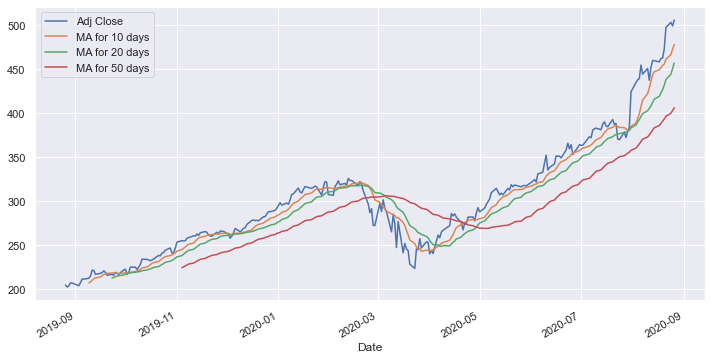

In [75]:
## Plotting the MOving Averages

AAPL[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(subplots = False, figsize = (12,6))

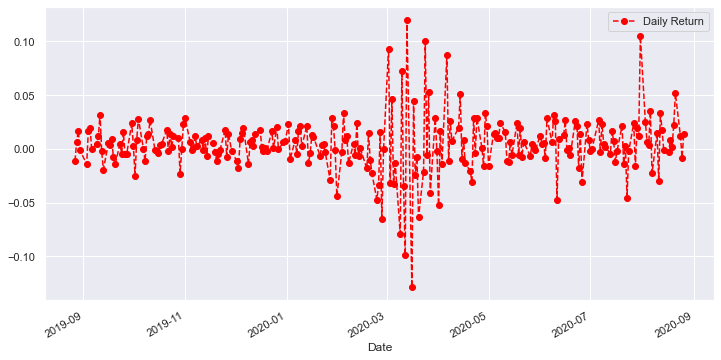

In [86]:
## Daily percentage change

AAPL['Daily Return'] = AAPL['Adj Close'].pct_change()

AAPL['Daily Return'].plot(figsize = (12,6),legend = True,linestyle = '--', marker = 'o', color = 'red')

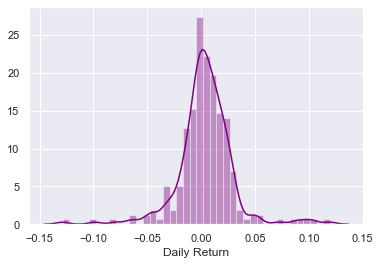

In [81]:
## Overall look of daily return using histogram

sns.distplot(AAPL['Daily Return'].dropna(), bins = 40, color = 'purple')

In [87]:
## Closing price of all the stocks in a dataframe

closing_df = DataReader(['AAPL','GOOG','MSFT','AMZN'], 'yahoo',start,end)['Adj Close']

In [89]:
closing_df.head()

Symbols,AAPL,GOOG,MSFT,AMZN
Date,,,,
2019-08-26,204.461349,1168.890015,133.925323,1768.869995
2019-08-27,202.154251,1167.839966,134.212051,1761.829956
2019-08-28,203.510803,1171.020020,134.034073,1764.250000
2019-08-29,206.956604,1192.849976,136.565262,1786.400024
2019-08-30,206.689255,1188.099976,136.308212,1776.290039


In [91]:
tech_returns = closing_df.pct_change()

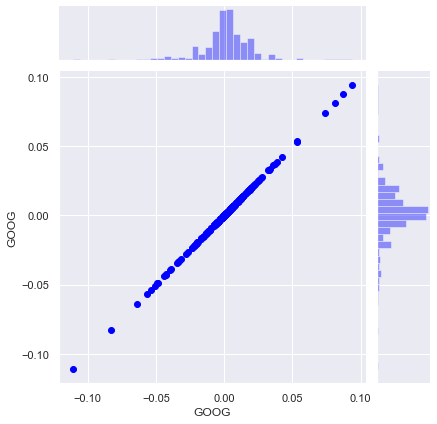

In [94]:
## COmparing google with itself which shows the highest correaltion

sns.jointplot('GOOG', 'GOOG', tech_returns, kind = 'scatter', color = 'blue')

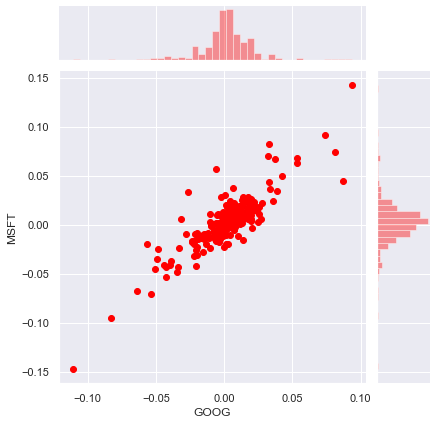

In [98]:
sns.jointplot('GOOG','MSFT',tech_returns,kind='scatter', color = 'red')

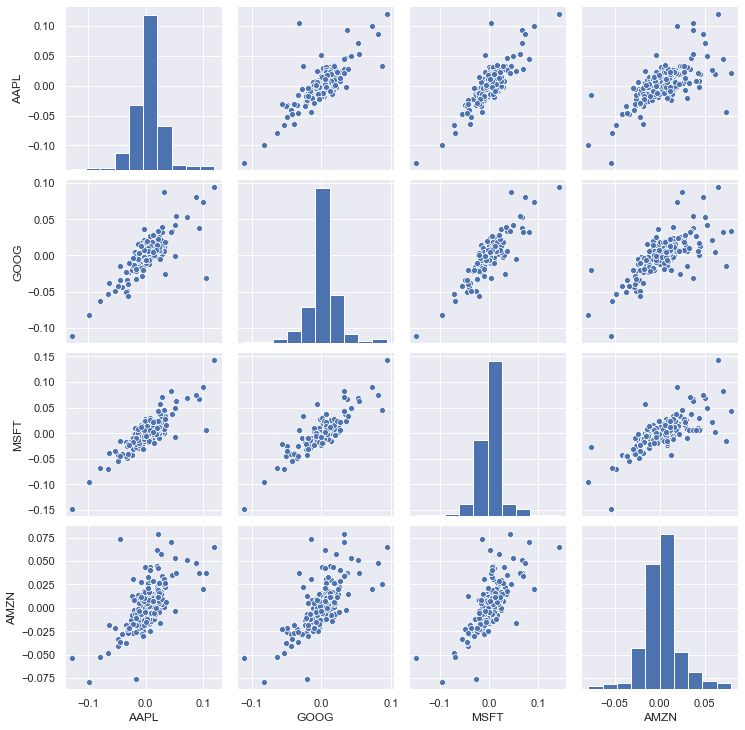

In [99]:
sns.pairplot(tech_returns.dropna())

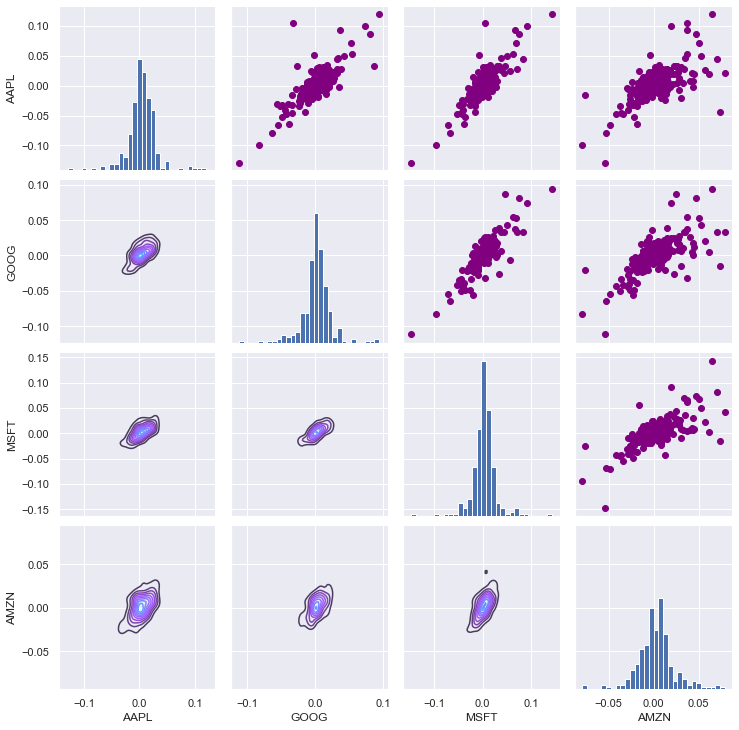

In [106]:
returns_figure = sns.PairGrid(tech_returns.dropna())

returns_figure.map_upper(plt.scatter, color = 'purple')

returns_figure.map_lower(sns.kdeplot, cmap = 'cool_d')

returns_figure.map_diag(plt.hist, bins = 30)

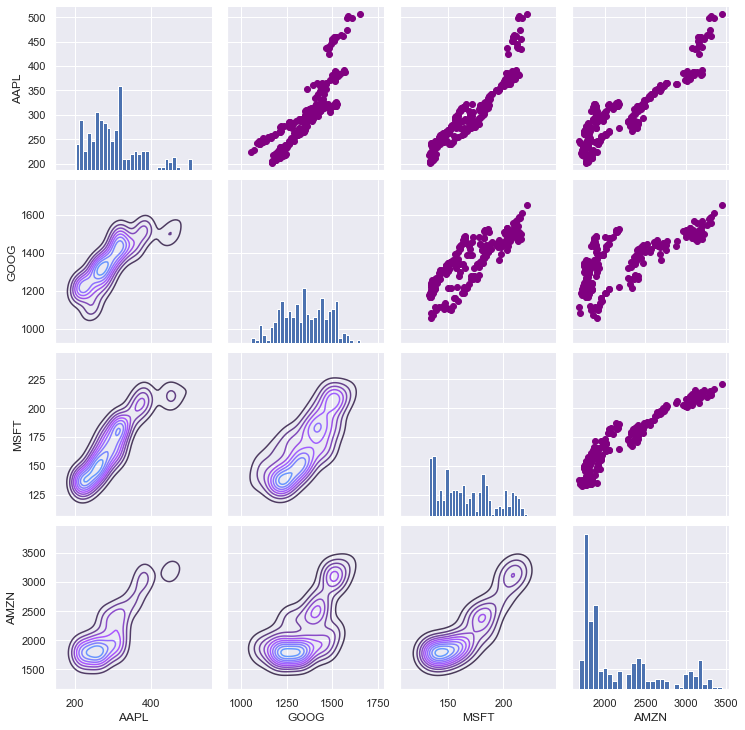

In [108]:
returns_figure = sns.PairGrid(closing_df)

returns_figure.map_upper(plt.scatter, color = 'purple')

returns_figure.map_lower(sns.kdeplot, cmap = 'cool_d')

returns_figure.map_diag(plt.hist, bins = 30)

In [120]:
tech_returns.corr()

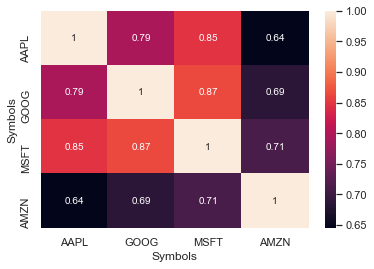

In [124]:
sns.heatmap(tech_returns.corr(), annot = True)

# <font color = 'red'> RISK ANALYSIS </font>

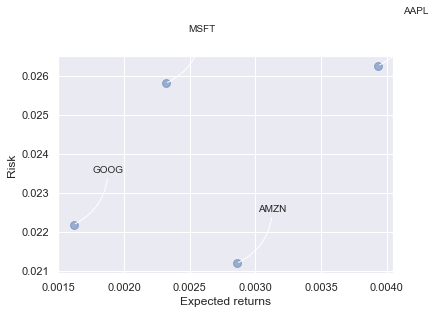

In [135]:
rets = tech_returns.dropna()

area = np.pi*20

plt.scatter(rets.mean(), rets.std(),alpha = 0.5,s =area)


plt.xlabel('Expected returns')
plt.ylabel('Risk')


for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(
        label, 
        xy = (x, y), xytext = (50, 50),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        arrowprops = dict(arrowstyle = '-', connectionstyle = 'arc3,rad=-0.3'))

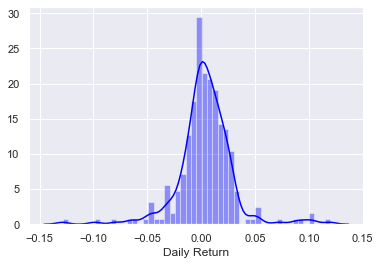

In [144]:
 sns.distplot(AAPL['Daily Return'].dropna(), color = 'blue', bins = 50)

In [143]:
returns.quantile(0.05)

Symbols
AAPL   -0.033011
GOOG   -0.036023
MSFT   -0.036328
AMZN   -0.026864
Name: 0.05, dtype: float64

# <font color = 'red'> MONTE CARLO METHOD </font> 

In [145]:
days = 365

dt = 1/days

mu = returns.mean()['GOOG']

sigma = returns.std()['GOOG']

In [169]:
def stock_monte_carlo(start_price, days, mu, sigma):
    price = np.zeros(days)
    price[0] = start_price
    
    shock = np.zeros(days)
    drift = np.zeros(days)
    
    for x in xrange(1, days):
        shock[x] = np.random.normal(loc = mu*dt, scale = sigma * np.sqrt(dt))
        drift[x] = mu*dt
        price[x] = price[x-1] + (price[x-1] * (drift[x] + shock[x]))
                                       
    return price

In [170]:
from six.moves import xrange

Text(0.5, 1.0, 'Monte Carlo Analysis for Google')

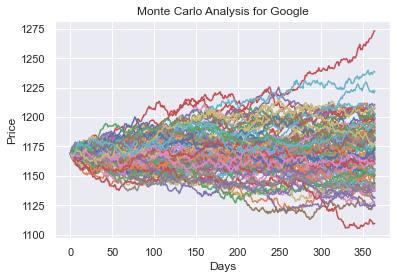

In [172]:
start_price = 1168.89

for run in xrange(100):
    plt.plot(stock_monte_carlo(start_price,days,mu,sigma))
plt.xlabel("Days")
plt.ylabel("Price")  
plt.title('Monte Carlo Analysis for Google')

In [173]:
runs = 10000


simulations = np.zeros(runs)


np.set_printoptions(threshold=5)

for run in xrange(runs):    
    simulations[run] = stock_monte_carlo(start_price,days,mu,sigma)[days-1];

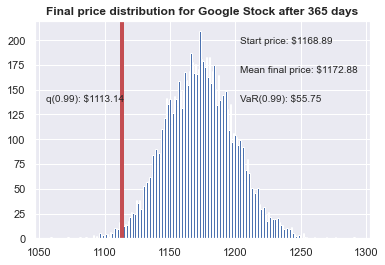

In [175]:
q = np.percentile(simulations, 1)
    

plt.hist(simulations,bins=200)

plt.figtext(0.6, 0.8, s="Start price: $%.2f" %start_price)

plt.figtext(0.6, 0.7, "Mean final price: $%.2f" % simulations.mean())

plt.figtext(0.6, 0.6, "VaR(0.99): $%.2f" % (start_price - q,))

plt.figtext(0.15, 0.6, "q(0.99): $%.2f" % q)

plt.axvline(x=q, linewidth=4, color='r')

plt.title(u"Final price distribution for Google Stock after %s days" % days, weight='bold');

In [ ]:
## 1% empirical quantile of the final price distribution to estimate the Value at Risk for the
## Google stock, which looks to be $55.75 for every investment of 1172.88 (the price of one inital google stock).

## This basically menas for every initial stock you purchase your putting about $55.75 at risk 99% of the time from our 
## Monte Carlo Simulation.